In [ ]:
pip install scikit-learn matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load California housing dataset

california = pd.read_csv("housing.csv")

In [ ]:
california.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
california.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:

X_all = california.data
y = california.target
feature_names = california.feature_names

AttributeError: 'DataFrame' object has no attribute 'data'

Mean Squared Error: 0.7091157771765549
R² Score: 0.45885918903846656
Coefficient (slope): 0.4193384939381271
Intercept: 0.4445972916907879


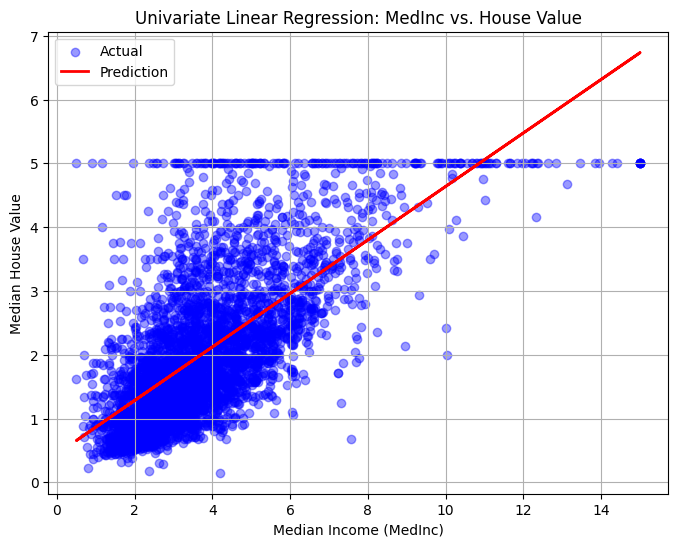

In [ ]:



# Use only one feature (e.g., 'MedInc' - median income)
#feature_index = feature_names.index()
#X = X_all[:, feature_index].reshape(-1, 1)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Univariate Linear Regression: MedInc vs. House Value')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(X_train)

[[3.2596]
 [3.8125]
 [4.1563]
 ...
 [2.9344]
 [5.7192]
 [2.5755]]


In [ ]:
print(y_train)

[1.03  3.821 1.726 ... 2.221 2.835 3.25 ]


In [ ]:
print(X_test)

[[1.6812]
 [2.5313]
 [3.4801]
 ...
 [9.2298]
 [2.785 ]
 [3.5521]]


In [ ]:
print(y_test)

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [ ]:
print(model)

LinearRegression()


In [ ]:
joblib.dump(model, "Linear regression.h5")

NameError: name 'joblib' is not defined

Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Intercept: 293083.06915066857
R² Score: 0.6494754192267803


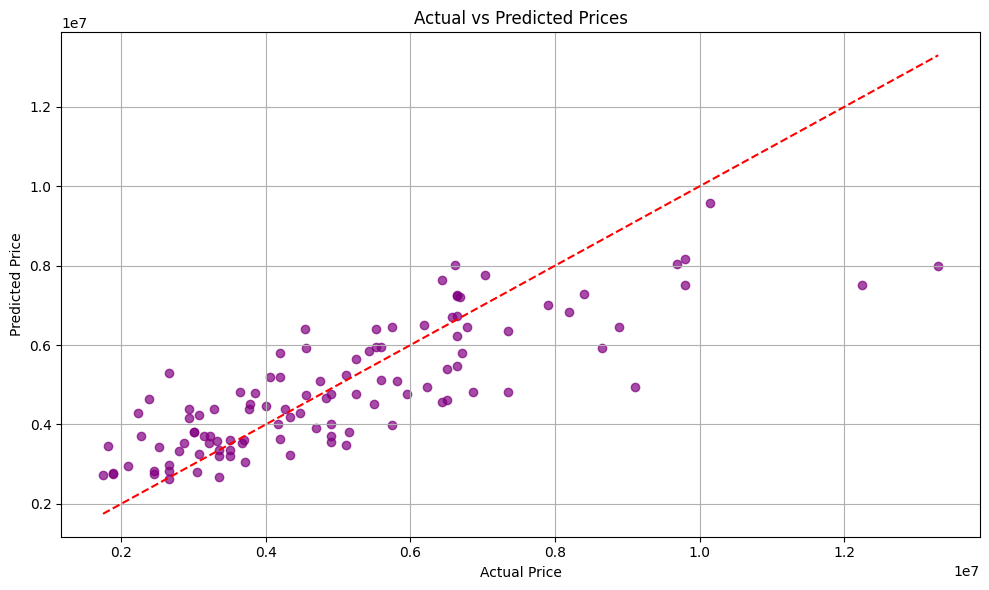

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("Housing.csv")

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'hotwaterheating', 'airconditioning', 'parking',
          'prefarea', 'furnishingstatus']]
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Output results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X_test, y_test))

# Plotting actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Ridge Regression (L2)
R² Score: 0.6489858025515296
--------------------------------------------------
Lasso Regression (L1)
R² Score: 0.6494747129728069
--------------------------------------------------


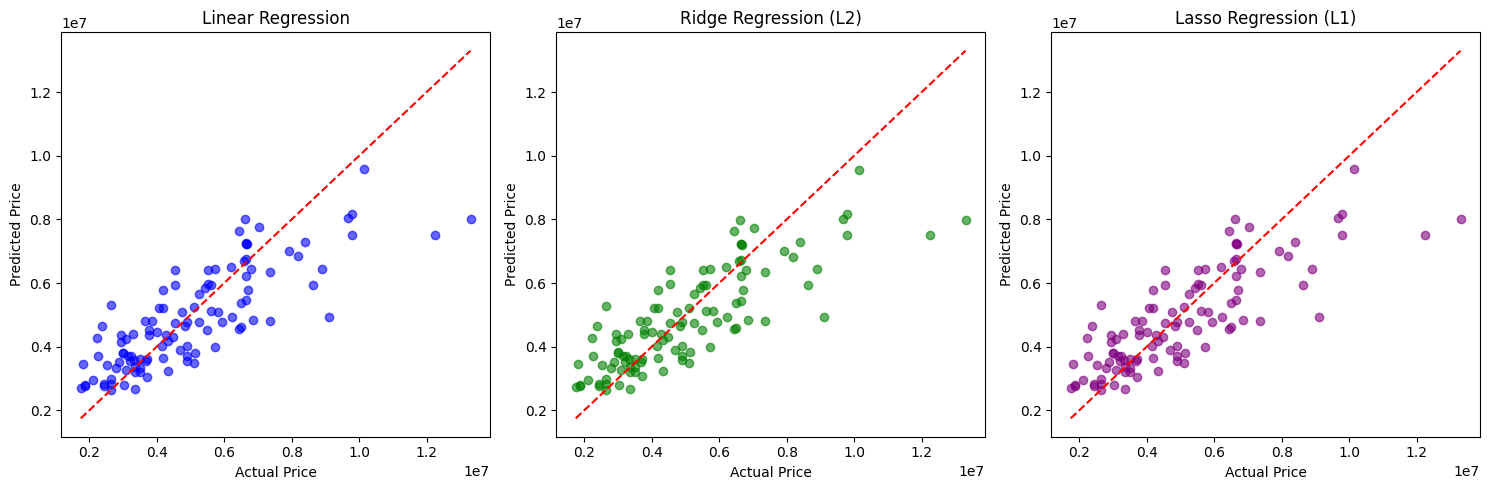

In [9]:
from sklearn.linear_model import Lasso, Ridge

# Ridge Regression (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression (L2)")
print("R² Score:", ridge_model.score(X_test, y_test))
print("-" * 50)

# Lasso Regression (L1)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression (L1)")
print("R² Score:", lasso_model.score(X_test, y_test))
print("-" * 50)

# Plotting all results together
plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Ridge Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Ridge Regression (L2)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Lasso Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Lasso Regression (L1)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()



Lasso Regression:
R² Score: 0.6494747129728069
MAE: 979680.730778263
MSE: 1771754686404.3557

Ridge Regression:
R² Score: 0.6489858025515296
MAE: 980105.6394817502
MSE: 1774225918472.8794

Polynomial Regression (degree=2):
R² Score: 0.6498883077078114
MAE: 1006766.482177489
MSE: 1769664142762.7512


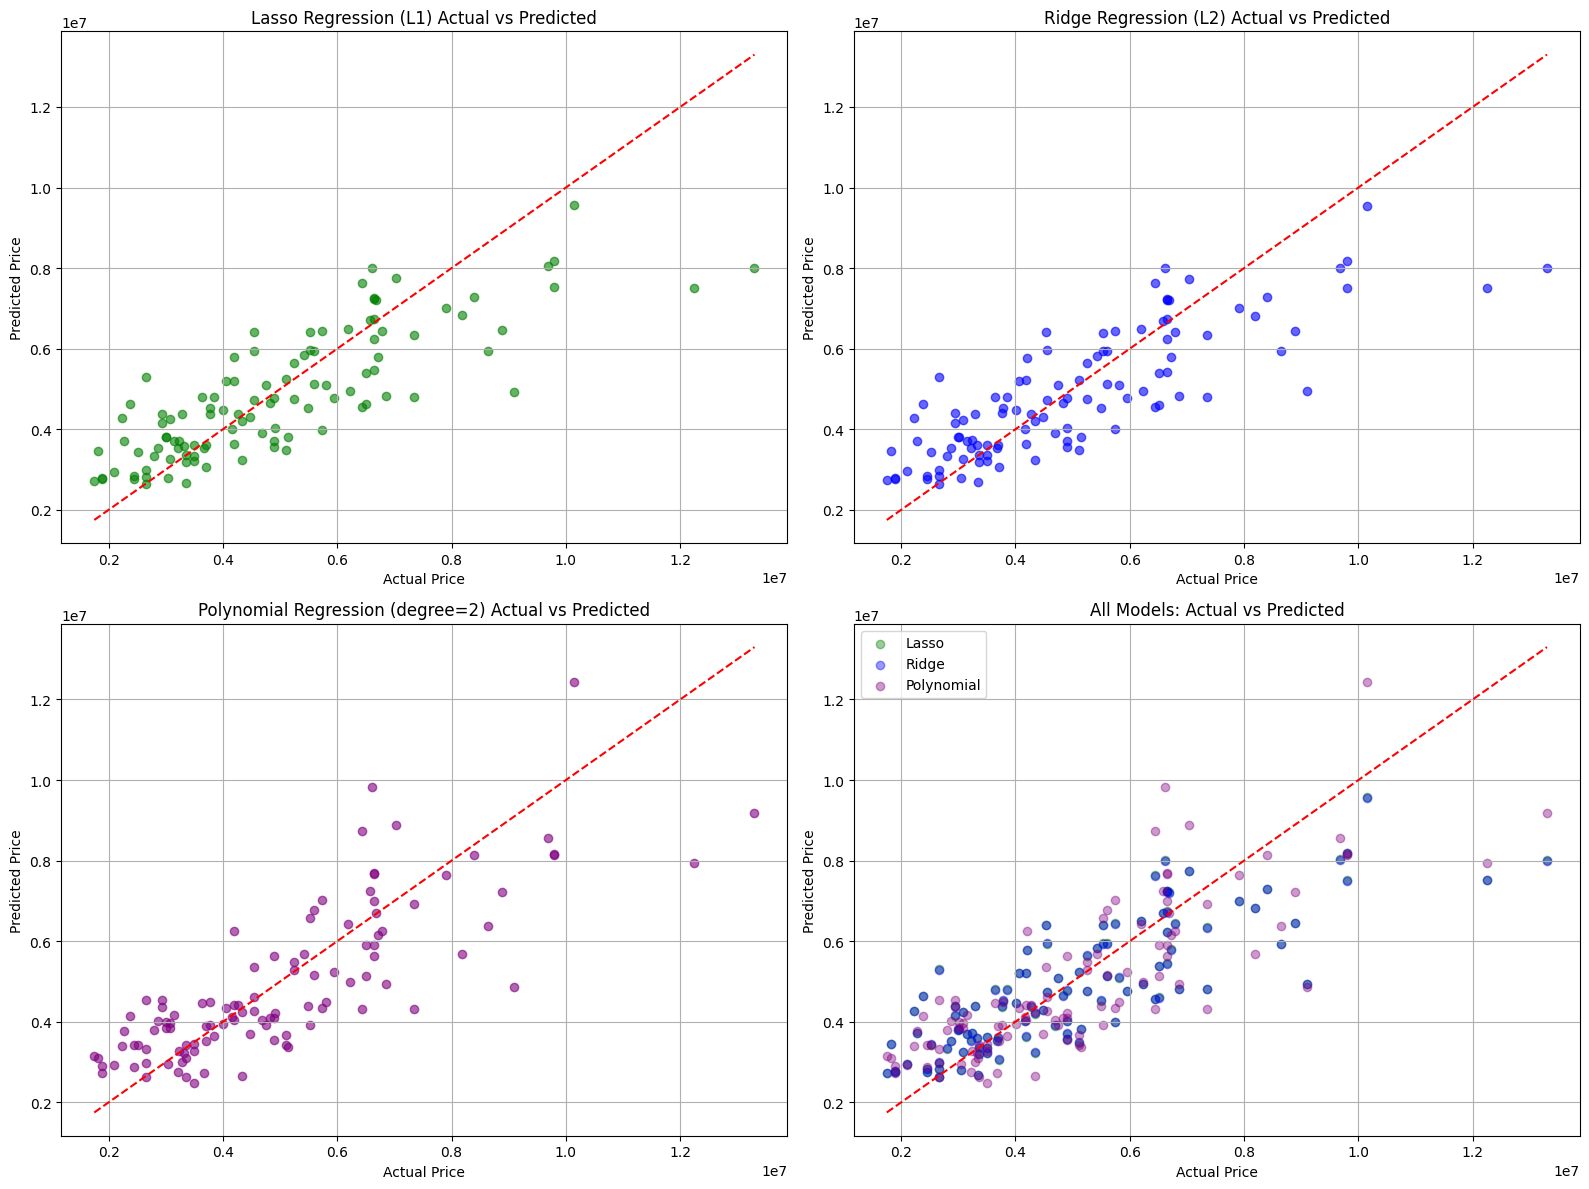

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("Housing.csv")

# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'hotwaterheating', 'airconditioning', 'parking',
          'prefarea', 'furnishingstatus']]
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Lasso Regression (L1) ---
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# --- Ridge Regression (L2) ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# --- Polynomial Regression (degree=2) ---
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation helper
def print_metrics(name, y_true, y_pred):
    print(f"\n{name}:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))

# Print metrics
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Ridge Regression", y_test, y_pred_ridge)
print_metrics(f"Polynomial Regression (degree={degree})", y_test, y_pred_poly)

# Plotting each separately
plt.figure(figsize=(16,12))

# 1. Lasso
plt.subplot(2,2,1)
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Lasso Regression (L1) Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# 2. Ridge
plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge Regression (L2) Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# 3. Polynomial Regression
plt.subplot(2,2,3)
plt.scatter(y_test, y_pred_poly, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f'Polynomial Regression (degree={degree}) Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# 4. Combined plot
plt.subplot(2,2,4)
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.4, label='Lasso')
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.4, label='Ridge')
plt.scatter(y_test, y_pred_poly, color='purple', alpha=0.4, label='Polynomial')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('All Models: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Lasso Regression:
R² Score: 0.6494747129728069
MAE: 979680.730778263
MSE: 1771754686404.3557

Ridge Regression:
R² Score: 0.6489858025515296
MAE: 980105.6394817502
MSE: 1774225918472.8794

Linear Regression:
R² Score: 0.6494754192267803
MAE: 979679.6912959901
MSE: 1771751116594.0352


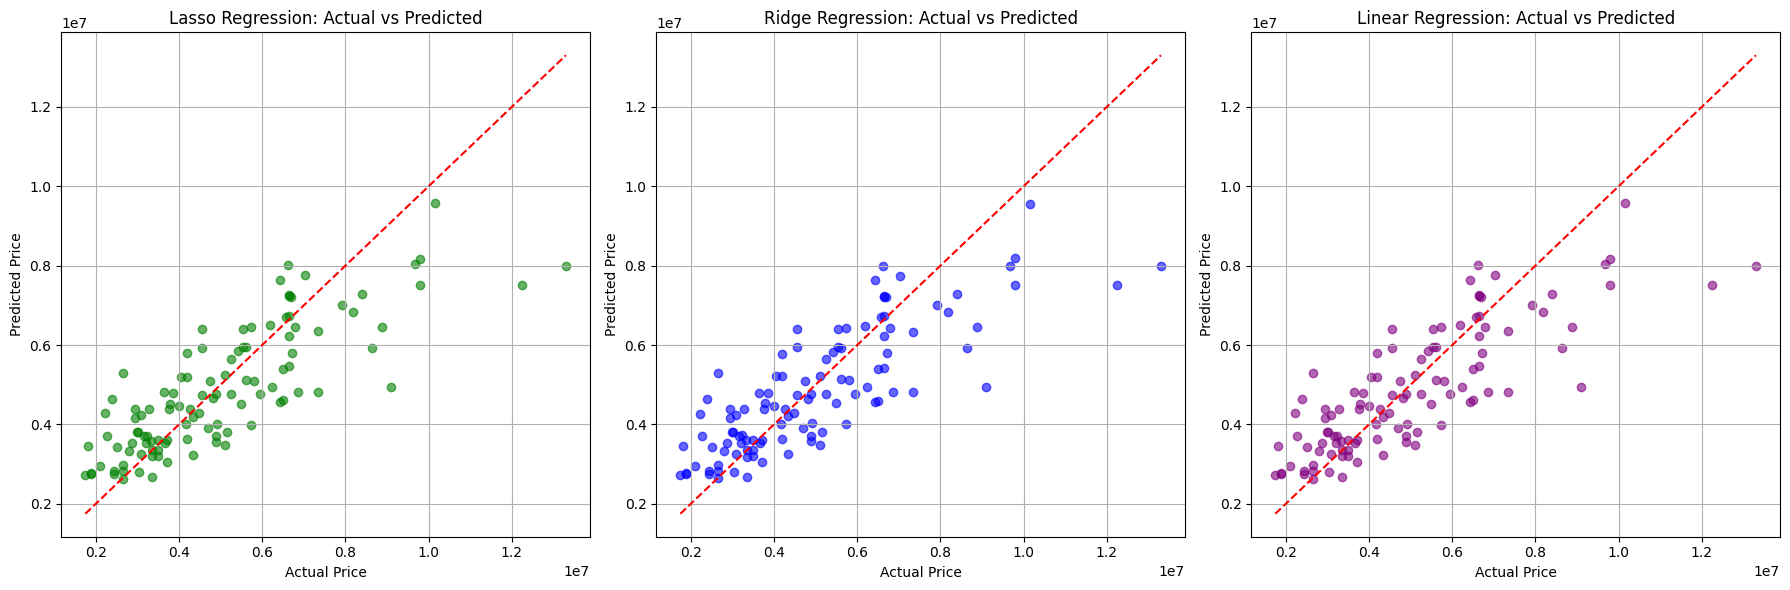

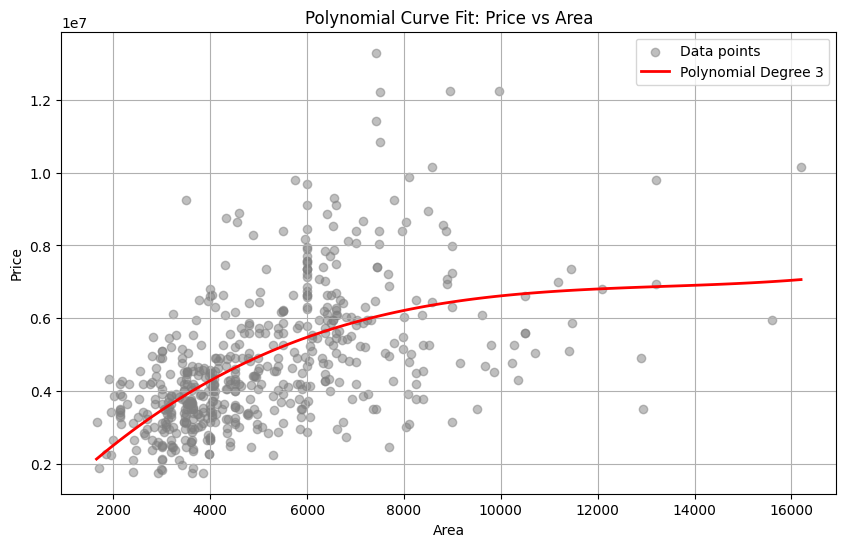

KeyError: 'Age'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("Housing.csv")

# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'hotwaterheating', 'airconditioning', 'parking',
          'prefarea', 'furnishingstatus']]
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Lasso Regression ---
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# --- Linear Regression ---
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)

# --- Polynomial Curve Fit on single feature 'area' ---
degree = 3
X_area = data[['area']].values
y_area = data['price'].values

poly = PolynomialFeatures(degree=degree)
X_area_poly = poly.fit_transform(X_area)

poly_model = LinearRegression()
poly_model.fit(X_area_poly, y_area)

# Create smooth points for curve
X_area_fit = np.linspace(X_area.min(), X_area.max(), 100).reshape(-1, 1)
X_area_fit_poly = poly.transform(X_area_fit)
y_area_fit = poly_model.predict(X_area_fit_poly)

# Function to print evaluation metrics
def print_metrics(name, y_true, y_pred):
    print(f"\n{name}:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))

# Print metrics for all models
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Ridge Regression", y_test, y_pred_ridge)
print_metrics("Linear Regression", y_test, y_pred_linear)

# Plot all models' predictions vs actual (Lasso, Ridge, Linear)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_linear, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Polynomial Curve Fit (area vs price)
plt.figure(figsize=(10, 6))
plt.scatter(X_area, y_area, color='gray', alpha=0.5, label='Data points')
plt.plot(X_area_fit, y_area_fit, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
plt.title('Polynomial Curve Fit: Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
# --- Sigmoid Curve with Classification Colors ---

# We'll use 'Age' as the single feature for plotting
# Make sure original data is available
age = X['Age'].values
target = y.values

# Train model on only 'Age' to visualize sigmoid
age_reshaped = age.reshape(-1, 1)
scaler_age = StandardScaler()
age_scaled = scaler_age.fit_transform(age_reshaped)

model_age = LogisticRegression()
model_age.fit(age_scaled, target)

# Create range of values for Age
age_range = np.linspace(age.min(), age.max(), 300).reshape(-1, 1)
age_range_scaled = scaler_age.transform(age_range)

# Predict probabilities for the range
probabilities = model_age.predict_proba(age_range_scaled)[:, 1]

# Plot
plt.figure(figsize=(10,6))

# Plot sigmoid curve
plt.plot(age_range, probabilities, color='black', linewidth=2, label='Sigmoid Curve (P(Survived))')

# Scatter actual points
# Color by actual survival status
survived_mask = target == 1
not_survived_mask = target == 0

plt.scatter(age[survived_mask], target[survived_mask], color='green', alpha=0.6, label='Survived (1)')
plt.scatter(age[not_survived_mask], target[not_survived_mask], color='red', alpha=0.6, label='Not Survived (0)')

plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title('Logistic Regression Sigmoid Curve: Survival by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Survival')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
